In [1]:
# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Downloads\\Python_work\\Edureka'

In [34]:
# Importing necessary libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

import keras
from keras.preprocessing.image import  ImageDataGenerator, img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [3]:
# Setting up data for augmentation
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True,
                                   preprocessing_function= preprocess_input )
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input )

In [23]:
# Setting the train and validation path
train_data = "\\Plant disease detection\\New Plant Diseases Dataset(Augmented)\\train\\"
valid_data = "\\Plant disease detection\\New Plant Diseases Dataset(Augmented)\\valid\\"
# os.path.join(os.getcwd() + train_data)//

In [22]:
# Generating augmented images for train and validation
train = train_datagen.flow_from_directory(directory= os.path.join(os.getcwd() + train_data),target_size= (256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory= os.path.join(os.getcwd() + valid_data), target_size= (256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [35]:
t_img , label = train.next()

def plotImage(img_arr, label):
    for im , l in zip(img_arr , label):
        plt.figure(figsize=(5,5))
        plt.show()
    
plotImage(t_img[:3], label[:3]);

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

**Building our model**

In [27]:
# Importing libraries for model building
from keras.layers import  Dense, Flatten 
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [28]:
# Instantiating the pre-trained VGG19 model
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80142336/80134624 [==============================] - 85s 1us/step


In [36]:
# Making the trainable layers false
for layer in base_model.layers:
    layer.trainable = False 

In [37]:
# Understanding the model architecture
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [38]:
# Adding the necessary layers to our model
X = Flatten()(base_model.output)
X = Dense(units= 38, activation='softmax')(X)

# Creating our model 
model = Model(base_model.input, X)
# Checkong the architecture after freezing the trainable layers
model.summary()

In [40]:
# Compiling the CNN model
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy , metrics= ['accuracy'])

**Early Stopping and Model Check point**

In [41]:
# Calling libraries for model checkpoint and early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping 

# Early stopping 
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

# Model check point 
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1,
                     save_best_only= True)
cb = [es, mc]

In [42]:
%%time
# Fitting the model on the trained data
his = model.fit(train, steps_per_epoch= 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= val, validation_steps= 16)
# his = model.fit_generator(train, steps_per_epoch= 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= val,
#                           validation_steps= 16 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 25.9080 - accuracy: 0.1836 
Epoch 00001: val_accuracy improved from -inf to 0.44531, saving model to best_model.h5
16/16 [==============================] - 474s 30s/step - loss: 25.9080 - accuracy: 0.1836 - val_loss: 12.6572 - val_accuracy: 0.4453
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 17.4401 - accuracy: 0.3965 
Epoch 00002: val_accuracy improved from 0.44531 to 0.53125, saving model to best_model.h5
16/16 [==============================] - 499s 31s/step - loss: 17.4401 - accuracy: 0.3965 - val_loss: 10.7168 - val_accuracy: 0.5312
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 13.3621 - accuracy: 0.5352 
Epoch 00003: val_accuracy improved from 0.53125 to 0.62109, saving model to best_model.h5
16/16 [==============================] - 522s 33s/step - loss: 13.3621 - accuracy: 0.5352 - val_loss: 1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


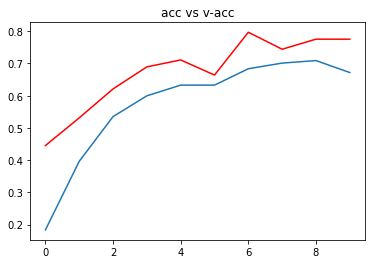

In [43]:
# Plotting the validation accuracy
h = his.history
print(h.keys())

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

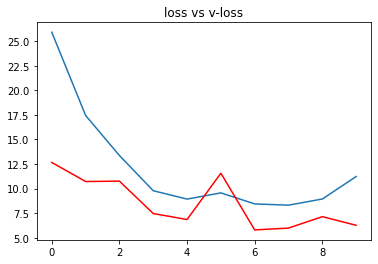

In [44]:
# Plotting the validation loss
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [49]:
# Loading the best model
from keras.models import load_model
model = load_model("best_model.h5")

In [50]:
%%time
# Evaluating the model accuracy
# acc = model.evaluate_generator(val)[1]
acc = model.evaluate(val)[1]
print(f"The accuracy of your model is = {acc*100} %")

550/550 [==============================] - 42918s 78s/step - loss: 6.1198 - accuracy: 0.7775
The accuracy of your model is = 77.74869203567505 %
Wall time: 11h 55min 32s


In [56]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [52]:
def prediction(path):
    img = load_img(path, target_size= (256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im , axis= 0)
    pred = np.argmax(model.predict(img))
    print(f" the image belongs to { ref[pred] } ")

In [54]:
path = "Plant disease detection/test/TomatoYellowCurlVirus4.JPG"
prediction(path)

 the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus 
